<a href="https://colab.research.google.com/github/mohammedarbaz119/Car-Price-Predictor-using-Machine-Learning/blob/main/CNNCAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np

In [3]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,BatchNormalization,Dropout,Activation,Flatten,Dense,InputLayer,ReLU,Add,GlobalAveragePooling2D

In [4]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models

In [6]:
data_dir = "/content/drive/MyDrive/car_ori"
img_height,img_width = 224,224
batch_size=32

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  label_mode='categorical',
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9907 files belonging to 33 classes.
Using 7926 files for training.


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  label_mode='categorical',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9907 files belonging to 33 classes.
Using 1981 files for validation.


In [9]:
calsse = train_ds.class_names
len(calsse)
train_ds.file_paths

['/content/drive/MyDrive/car_ori/Torres/Torres00160.jpg',
 '/content/drive/MyDrive/car_ori/CASPER/Caspe (7).jpg',
 '/content/drive/MyDrive/car_ori/K8/K8 (14).jpg',
 '/content/drive/MyDrive/car_ori/G70/G70 (12).jpg',
 '/content/drive/MyDrive/car_ori/Stinger/STINGER (112).jpg',
 '/content/drive/MyDrive/car_ori/Ray/Ray (187).jpg',
 '/content/drive/MyDrive/car_ori/K5/K5 (110).jpg',
 '/content/drive/MyDrive/car_ori/Korando/KORANDO (17).jpeg',
 '/content/drive/MyDrive/car_ori/Sportage/SPORTAGE (104).jpg',
 '/content/drive/MyDrive/car_ori/sm6/sm6 (201).jpg',
 '/content/drive/MyDrive/car_ori/Morning/MORNING (94).jpg',
 '/content/drive/MyDrive/car_ori/STARIA/STARIA (176).jpg',
 '/content/drive/MyDrive/car_ori/NEXO/NEXO_00045.jpg',
 '/content/drive/MyDrive/car_ori/NEXO/NEXO (100).jpg',
 '/content/drive/MyDrive/car_ori/NiroEV/NiroEV (194).jpg',
 '/content/drive/MyDrive/car_ori/PALISADE/PALISADE (204).jpg',
 '/content/drive/MyDrive/car_ori/Sportage/SPORTAGE (8).jpg',
 '/content/drive/MyDrive/car_o

In [10]:
classs = val_ds.class_names
len(classs)
val_ds.file_paths

['/content/drive/MyDrive/car_ori/Morning/MORNING (118).jpg',
 '/content/drive/MyDrive/car_ori/SONATA/SONATA (227).jpg',
 '/content/drive/MyDrive/car_ori/AVANTE/AVANT (27).jpg',
 '/content/drive/MyDrive/car_ori/GV60/GV60 (247).jpg',
 '/content/drive/MyDrive/car_ori/Stinger/Stinger (268).jpg',
 '/content/drive/MyDrive/car_ori/K5/K5 (68).jpg',
 '/content/drive/MyDrive/car_ori/VENUE/VENUE (31).jpg',
 '/content/drive/MyDrive/car_ori/NiroEV/NiroEV (247).jpg',
 '/content/drive/MyDrive/car_ori/Torres/Torres2.jpg',
 '/content/drive/MyDrive/car_ori/Sorento/SORENTO (66).jpg',
 '/content/drive/MyDrive/car_ori/Rexton/REXTON (131).jpg',
 '/content/drive/MyDrive/car_ori/EV6/EV6_(72).jpg',
 '/content/drive/MyDrive/car_ori/VENUE/VENUE (50).png',
 '/content/drive/MyDrive/car_ori/Seltos/SELTOS (161).jpg',
 '/content/drive/MyDrive/car_ori/GRANDEUR/GRANDEUR (112).jpg',
 '/content/drive/MyDrive/car_ori/Ray/RAY (112).jpg',
 '/content/drive/MyDrive/car_ori/K9/K9 (67).jpg',
 '/content/drive/MyDrive/car_ori/SON

In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [73]:
import tensorflow.keras.applications.mobilenet as  mobilenet
base_model = mobilenet.MobileNet(
    include_top=False,
    weights='imagenet',
  input_shape=(224,224,3))
base_model.trainable = True
model = models.Sequential()
model.add(InputLayer(input_shape=(224,224,3)))
model.add(layers.Rescaling(1./127.5,offset=-1))
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(33 , activation = 'softmax'))

In [74]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_23 (Rescaling)    (None, 224, 224, 3)       0         
                                                                 
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 global_average_pooling2d_6  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_22 (Dropout)        (None, 1024)              0         
                                                                 
 dense_41 (Dense)            (None, 128)               131200    
                                                                 
 dropout_23 (Dropout)        (None, 128)             

In [75]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
call = tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True,monitor="val_loss")


In [76]:
history = model.fit(train_ds,validation_data=val_ds,epochs=50,callbacks=[call])

Epoch 1/50
248/248 [==============================] - 62s 124ms/step - loss: 1.3020 - accuracy: 0.6375 - val_loss: 3.4111 - val_accuracy: 0.3246
Epoch 2/50
248/248 [==============================] - 30s 122ms/step - loss: 0.4897 - accuracy: 0.8509 - val_loss: 1.1282 - val_accuracy: 0.6911
Epoch 3/50
248/248 [==============================] - 30s 122ms/step - loss: 0.2827 - accuracy: 0.9138 - val_loss: 0.9044 - val_accuracy: 0.7703
Epoch 4/50
248/248 [==============================] - 30s 121ms/step - loss: 0.2110 - accuracy: 0.9317 - val_loss: 0.9013 - val_accuracy: 0.7971
Epoch 5/50
248/248 [==============================] - 30s 122ms/step - loss: 0.1632 - accuracy: 0.9498 - val_loss: 0.4836 - val_accuracy: 0.8718
Epoch 6/50
248/248 [==============================] - 30s 121ms/step - loss: 0.1431 - accuracy: 0.9558 - val_loss: 0.5638 - val_accuracy: 0.8708
Epoch 7/50
248/248 [==============================] - 30s 122ms/step - loss: 0.1375 - accuracy: 0.9604 - val_loss: 0.4737 - val_ac

In [77]:
plot  = tf.keras.utils.plot_model(model,show_shapes=True)

In [65]:
import pandas as pd
history = pd.DataFrame(history.history)

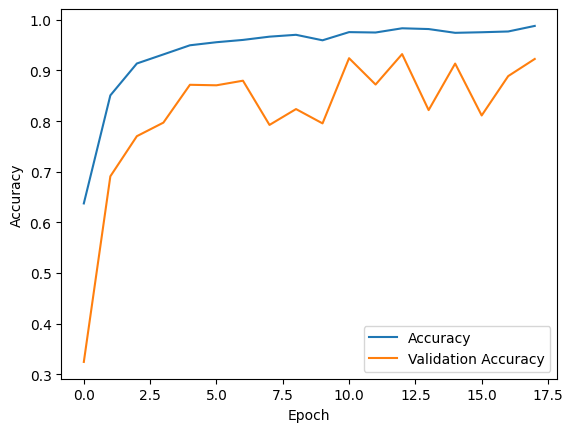

In [79]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [87]:
img = '/content/santas (1).jpg'


In [88]:
image = tf.keras.utils.load_img(img)

In [89]:
imgg = tf.keras.utils.img_to_array(image)


In [112]:
predi = model.predict(imgg.reshape(1,224,224,3))
predi
calsse[20]

1/1 [==============================] - 0s 22ms/step


'SONATA'

In [ ]:

# cnn = models.Sequential()

# cnn.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

# cnn.add(Conv2D(32,kernel_size=(3,3),input_shape=(128,128,3)))
# cnn.add(Activation('relu'))
# cnn.add(BatchNormalization())
# # cnn.add(Dropout(0.15))
# cnn.add(MaxPool2D(pool_size=(2,2)))

# #Adding 2nd Convolution and Pooling Layer
# cnn.add(Conv2D(64,kernel_size=(3,3)))
# cnn.add(Activation('relu'))
# cnn.add(BatchNormalization())
# # cnn.add(Dropout(0.15))
# cnn.add(MaxPool2D(pool_size=(2,2)))

# #Adding 3rd Convolution and Pooling Layer
# cnn.add(Conv2D(64,kernel_size=(3,3)))
# cnn.add(Activation('relu'))
# cnn.add(BatchNormalization())
# # cnn.add(Dropout(0.15))
# cnn.add(MaxPool2D(pool_size=(2,2)))

# #Adding 4th Convolution and Pooling Layer
# cnn.add(Conv2D(128,kernel_size=(3,3)))
# cnn.add(Activation('relu'))
# cnn.add(BatchNormalization())
# # cnn.add(Dropout(0.15))
# cnn.add(MaxPool2D(pool_size=(2,2)))

# #Adding 5th Convolution and Pooling Layer
# cnn.add(Conv2D(128,kernel_size=(3,3)))
# cnn.add(Activation('relu'))
# cnn.add(BatchNormalization())
# # cnn.add(Dropout(0.15))
# cnn.add(MaxPool2D(pool_size=(2,2)))


# cnn.add(Flatten())
# cnn.add(Dense(512,activation="relu"))
# cnn.add(Dense(256,activation="relu"))
# cnn.add(Dense(len(calsse),activation="softmax"))

In [ ]:
# cnn.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
# print(cnn.summary())


In [ ]:
# call = tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True,monitor="val_loss")
# epochs=50
# history = cnn.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=epochs,
#   callbacks=[call]
# )

In [ ]:
# import matplotlib.pyplot as plt

# # plt.figure(figsize=(10, 10))
# # for images, labels in val_ds.take(1):
# #   for i in range(9):
# #     ax = plt.subplot(3, 3, i + 1)
# #     plt.imshow(images[i].numpy().astype("uint8"))
# #     plt.title(calsse[labels[i]])
# #     plt.axis("off")
# #     print(cnn.predict(images[i].numpy().reshape(128,128,3)))
#     # print(cnn.predict(images[i].numpy()))
# images =val_ds.take(1)
# for img,lab in images:
#   image = tf.reshape(img[2], (1, 128, 128, 3))
#   print(cnn.predict(image).max(),lab[2])